<a href="https://colab.research.google.com/github/DhawalV1/Computational_Neuroscience/blob/main/Convolving_with_HRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Convolving with the hemodyamic response function

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import gamma

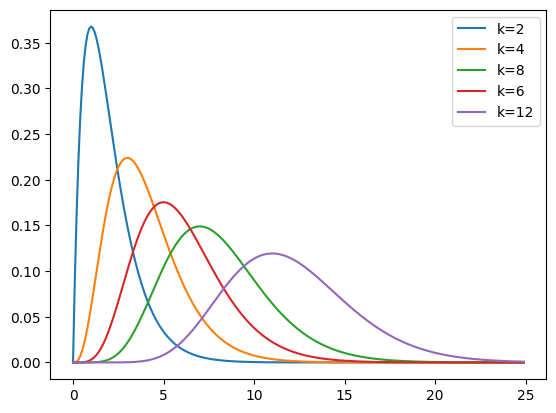

In [26]:
x = np.arange(0, 25, 0.1)
plt.plot(x, gamma.pdf(x, 2), label='k=2')

plt.plot(x, gamma.pdf(x, 4), label='k=4')

plt.plot(x, gamma.pdf(x, 8), label='k=8')
plt.plot(x, gamma.pdf(x, 6), label='k=6')
plt.plot(x, gamma.pdf(x, 12), label='k=12')

plt.legend()


##Constructing a hemodynamic response function


We can use these gamma functions to construct a continuous function that is close to the hemodynamic response we observe for a single brief event in the brain.

In [29]:
def hrf(times):
    """ Return values for HRF at given times """
    # Gamma pdf for the peak
    peak_values = gamma.pdf(times, 6)
    # Gamma pdf for the undershoot
    undershoot_values = gamma.pdf(times, 12)
    # Combine them
    values = peak_values - 0.35 * undershoot_values
    # Scale max to 0.6
    return values / np.max(values)*0.6


Text(0, 0.5, 'HRF model of signal')

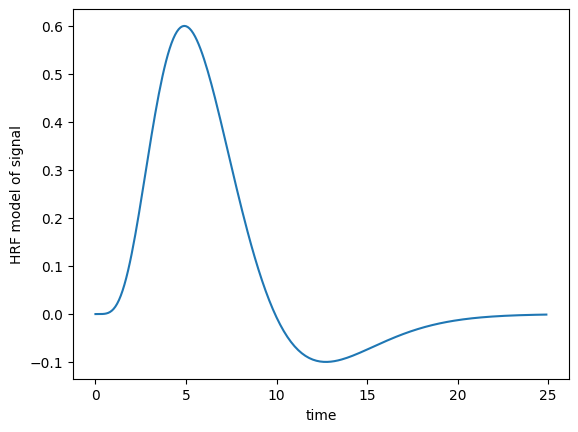

In [30]:
plt.plot(x, hrf(x))
plt.xlabel('time')
plt.ylabel('HRF model of signal')


12


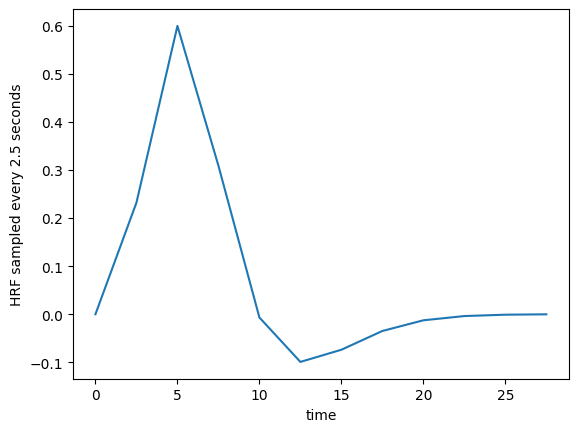

In [31]:
TR = 2.5
tr_times = np.arange(0, 30, TR)
hrf_at_trs = hrf(tr_times)

# Print the length of hrf_at_trs
print(len(hrf_at_trs))  # Output: 12

# Plot the HRF sampled every 2.5 seconds
plt.plot(tr_times, hrf_at_trs)
plt.xlabel('time')
plt.ylabel('HRF sampled every 2.5 seconds')
plt.show()


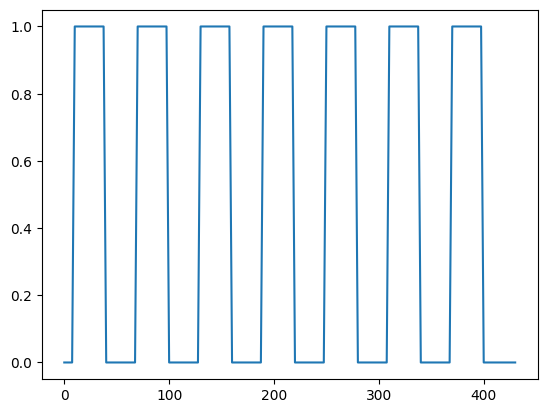

In [34]:
from stimuli import events2neural
n_vols = 173
neural_prediction = events2neural('ds114_sub009_t2r1_cond.txt',
                                  TR, n_vols)
all_tr_times = np.arange(173) * TR
plt.plot(all_tr_times, neural_prediction)


In [35]:
convolved = np.convolve(neural_prediction, hrf_at_trs)
N = len(neural_prediction)  # M == n_vols == 173
M = len(hrf_at_trs)  # M == 12
len(convolved) == N + M - 1

True

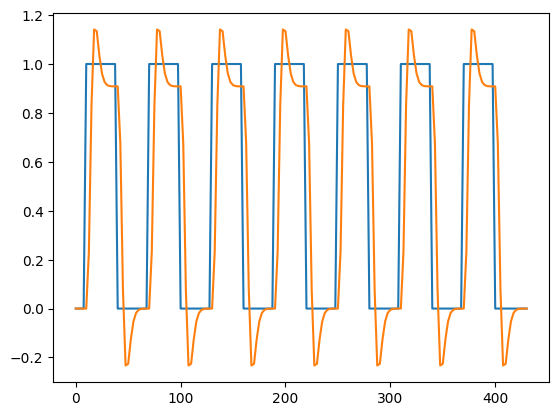

In [36]:
convolved = convolved[:- len(hrf_at_trs) + 1]
plt.plot(all_tr_times, neural_prediction)
plt.plot(all_tr_times, convolved)

In [38]:
np.savetxt('ds114_sub009_t2r1_conv.txt', convolved, fmt='%2.6f')
back = np.loadtxt('ds114_sub009_t2r1_conv.txt')
np.allclose(convolved, back, atol=1e-6)

True

## Short tutorial on Convolution

In [39]:
%matplotlib inline

Text(0.5, 1.0, 'Neural model for 5 second event starting at time 4')

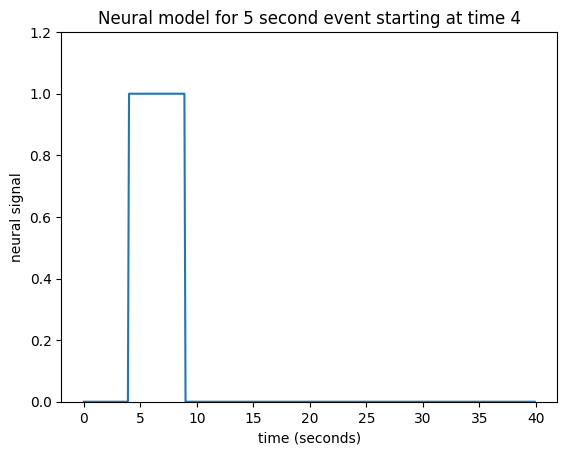

In [50]:
times = np.arange(0, 40, 0.1)
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)
neural_signal[(times >= 4) & (times < 9)] = 1
plt.plot(times, neural_signal)

plt.xlabel('time (seconds)')

plt.ylabel('neural signal')

plt.ylim(0, 1.2)

plt.title("Neural model for 5 second event starting at time 4")

Text(0.5, 1.0, 'Neural model for very brief event at time 4')

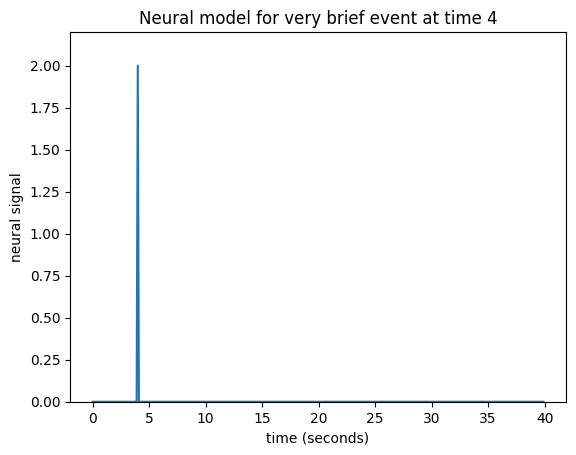

In [56]:
neural_signal = np.zeros(n_time_points)
i_time_4 = np.where(times == 4)[0][0]  # index of value 4 in "times"
neural_signal[i_time_4] = 2  # A single spike at time == 4
plt.plot(times, neural_signal)

plt.xlabel('time (seconds)')

plt.ylabel('neural signal')

plt.ylim(0, 2.2)

plt.title("Neural model for very brief event at time 4")

In [52]:
def hrf(t):
    "A hemodynamic response function"
    return t ** 8.6 * np.exp(-t / 0.547)

Text(0.5, 1.0, 'Estimated BOLD signal for event at time 0')

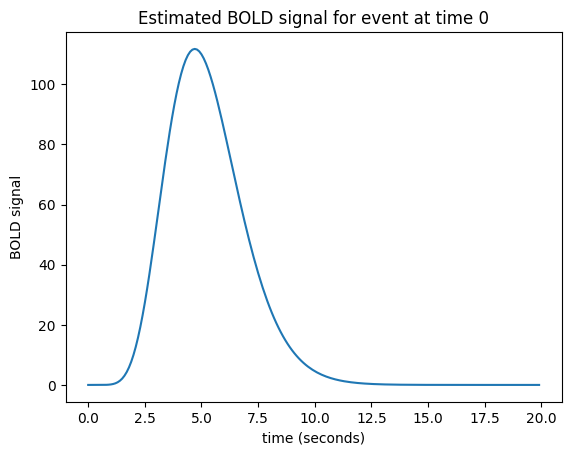

In [53]:
hrf_times = np.arange(0, 20, 0.1)
hrf_signal = hrf(hrf_times)
plt.plot(hrf_times, hrf_signal)

plt.xlabel('time (seconds)')

plt.ylabel('BOLD signal')

plt.title('Estimated BOLD signal for event at time 0')

In [ ]:
bold_signal = np.convolve(neural_signal, hrf_signal)
plt.plot(times_and_tail, bold_signal)

Text(0.5, 1.0, 'Output BOLD signal for event at time=4')

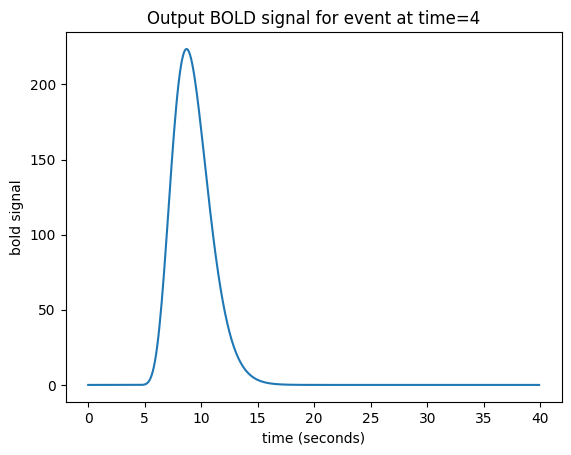

In [57]:
n_hrf_points = len(hrf_signal)
bold_signal = np.zeros(n_time_points)
bold_signal[i_time_4:i_time_4 + n_hrf_points] = hrf_signal * 2
plt.plot(times, bold_signal)

plt.xlabel('time (seconds)')

plt.ylabel('bold signal')

plt.title('Output BOLD signal for event at time=4')

Text(0.5, 1.0, 'Neural model for three impulses')

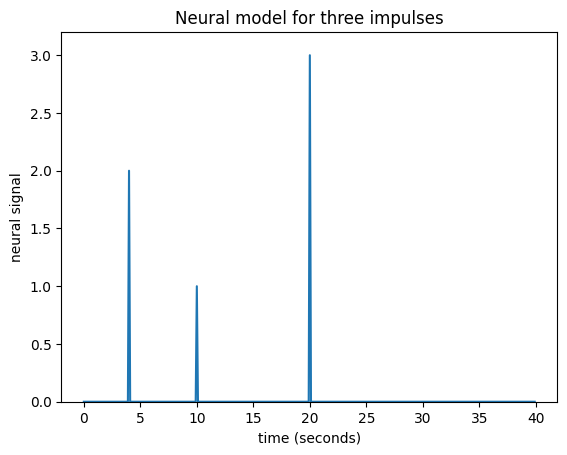

In [58]:
neural_signal[i_time_4] = 2  # An impulse with amplitude 2
i_time_10 = np.where(times == 10)[0][0]  # index of value 10 in "times"
neural_signal[i_time_10] = 1  # An impulse with amplitude 1
i_time_20 = np.where(times == 20)[0][0]  # index of value 20 in "times"
neural_signal[i_time_20] = 3  # An impulse with amplitude 3
plt.plot(times, neural_signal)

plt.xlabel('time (seconds)')

plt.ylabel('neural signal')

plt.ylim(0, 3.2)

plt.title('Neural model for three impulses')

Text(0.5, 1.0, 'Output BOLD signal for three impulses')

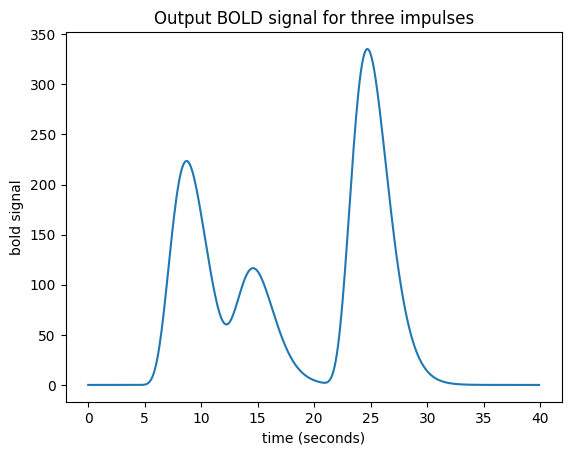

In [59]:
bold_signal = np.zeros(n_time_points)
bold_signal[i_time_4:i_time_4 + n_hrf_points] = hrf_signal * 2
bold_signal[i_time_10:i_time_10 + n_hrf_points] += hrf_signal * 1
bold_signal[i_time_20:i_time_20 + n_hrf_points] += hrf_signal * 3
plt.plot(times, bold_signal)

plt.xlabel('time (seconds)')

plt.ylabel('bold signal')

plt.title('Output BOLD signal for three impulses')

Text(0.5, 1.0, 'Neural model including event lasting 0.5 seconds')

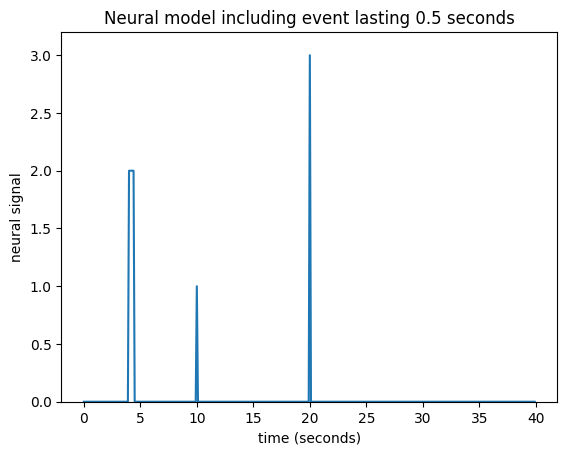

In [60]:
neural_signal[i_time_4:i_time_4 + 5] = 2
plt.plot(times, neural_signal)

plt.xlabel('time (seconds)')

plt.ylabel('neural signal')

plt.ylim(0, 3.2)

plt.title('Neural model including event lasting 0.5 seconds')

Text(0.5, 1.0, 'Output BOLD signal with event lasting 0.5 seconds')

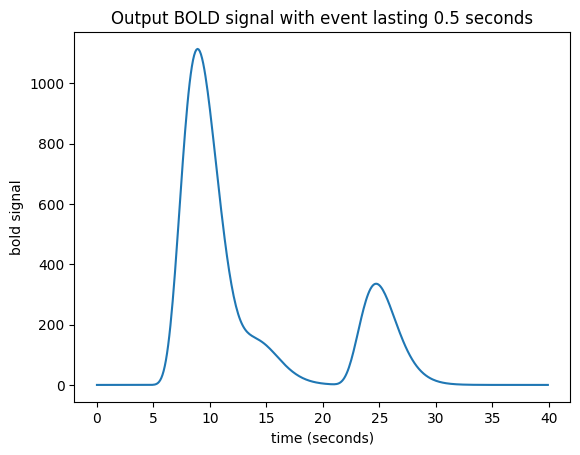

In [61]:
bold_signal = np.zeros(n_time_points)
for i in range(5):
    bold_signal[i_time_4 + i:i_time_4  + i + n_hrf_points] += hrf_signal * 2
bold_signal[i_time_10:i_time_10 + n_hrf_points] += hrf_signal * 1
bold_signal[i_time_20:i_time_20 + n_hrf_points] += hrf_signal * 3
plt.plot(times, bold_signal)

plt.xlabel('time (seconds)')

plt.ylabel('bold signal')

plt.title('Output BOLD signal with event lasting 0.5 seconds')

Text(0.5, 1.0, 'Output BOLD signal using our algorithm')

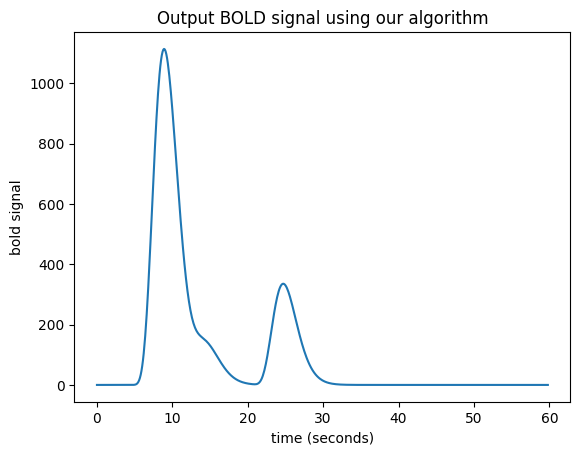

In [64]:
N = n_time_points
M = n_hrf_points
bold_signal = np.zeros(N + M - 1)  # adding the tail
for i in range(N):
    input_value = neural_signal[i]
    # Adding the shifted, scaled HRF
    bold_signal[i : i + n_hrf_points] += hrf_signal * input_value
# We have to extend 'times' to deal with more points in 'bold_signal'
extra_times = np.arange(n_hrf_points - 1) * 0.1 + 40
times_and_tail = np.concatenate((times, extra_times))
plt.plot(times_and_tail, bold_signal)

plt.xlabel('time (seconds)')

plt.ylabel('bold signal')

plt.title('Output BOLD signal using our algorithm')

Text(0.5, 1.0, 'Our algorithm is the same as convolution')

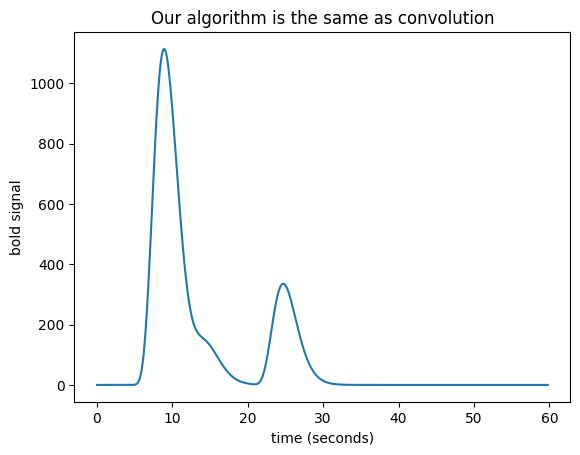

In [65]:
bold_signal = np.convolve(neural_signal, hrf_signal)
plt.plot(times_and_tail, bold_signal)

plt.xlabel('time (seconds)')

plt.ylabel('bold signal')

plt.title('Our algorithm is the same as convolution')

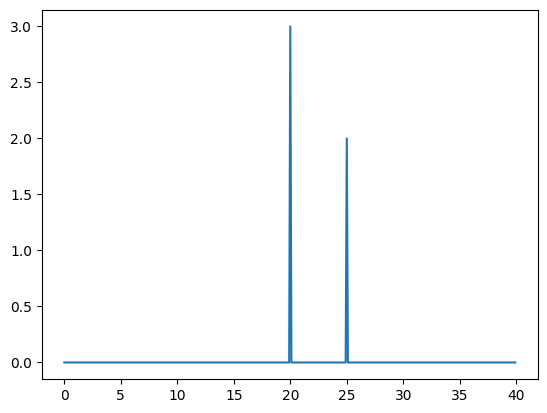

In [76]:
neural_signal[0:150] = 0
plt.plot(times, neural_signal)

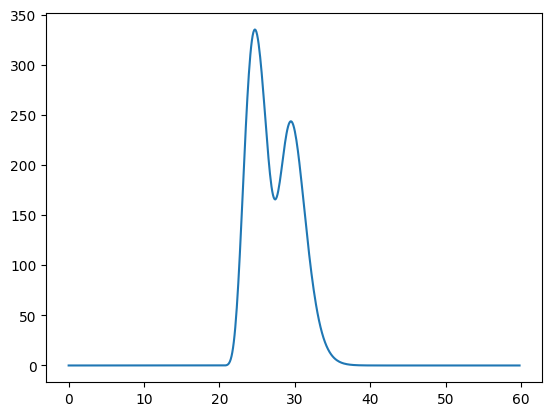

In [77]:
bold_signal = np.convolve(neural_signal, hrf_signal)
plt.plot(times_and_tail, bold_signal)

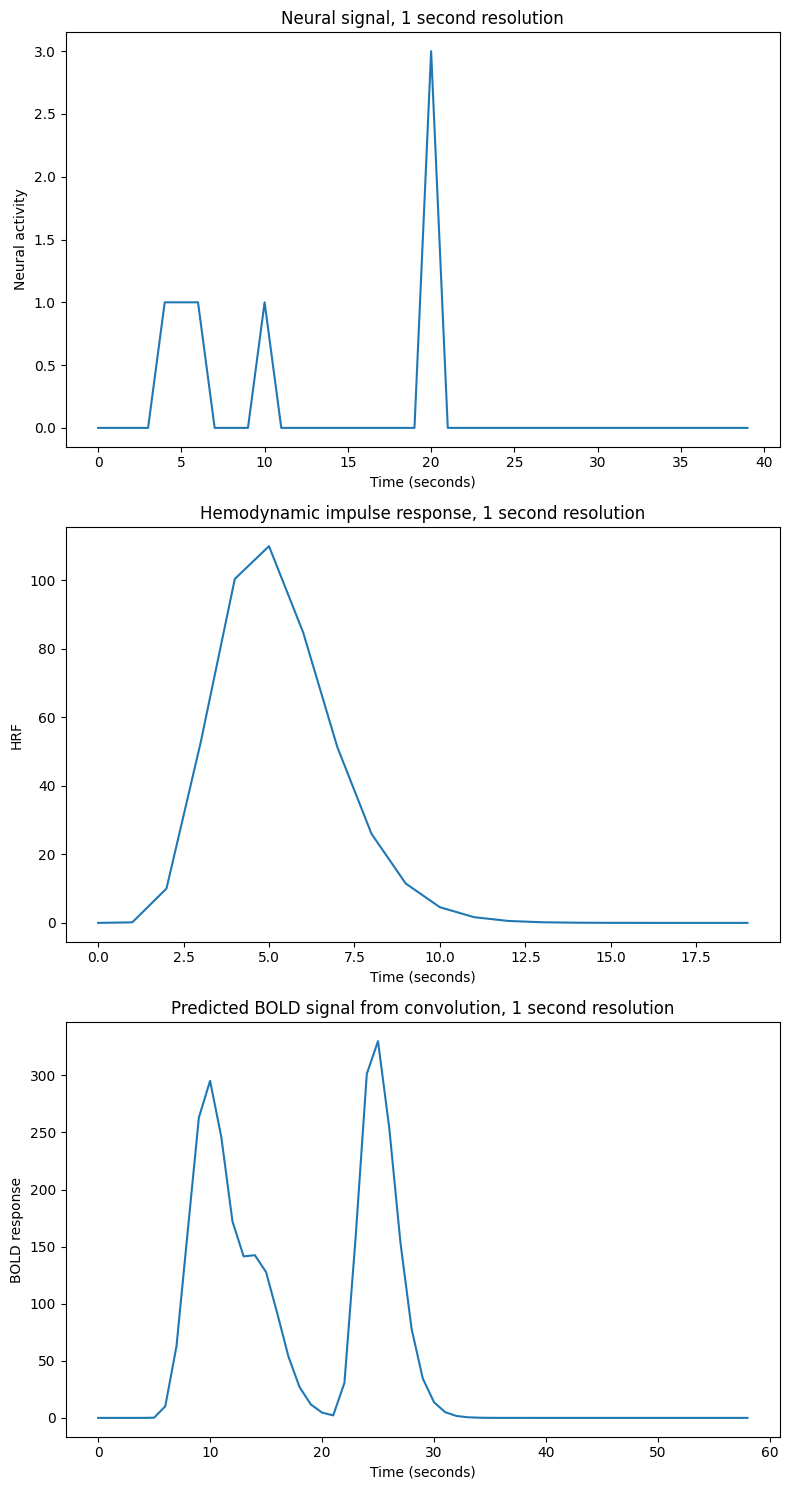

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Define the neural signal
times = np.arange(0, 40)  # One time point per second
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)
neural_signal[4:7] = 1  # A 3 second event
neural_signal[10] = 1
neural_signal[20] = 3

# Define the HRF signal
hrf_times = np.arange(20)
hrf_signal = hrf(hrf_times)  # The HRF at one second time resolution
n_hrf_points = len(hrf_signal)

# Convolve neural signal with HRF to get the BOLD signal
bold_signal = np.convolve(neural_signal, hrf_signal)

# Define time points for plotting the convolution result
times_and_tail = np.arange(n_time_points + n_hrf_points - 1)

# Plotting the neural signal, HRF, and BOLD signal
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# Plot neural signal
axes[0].plot(times, neural_signal)
axes[0].set_title('Neural signal, 1 second resolution')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Neural activity')

# Plot HRF signal
axes[1].plot(hrf_times, hrf_signal)
axes[1].set_title('Hemodynamic impulse response, 1 second resolution')
axes[1].set_xlabel('Time (seconds)')
axes[1].set_ylabel('HRF')

# Plot BOLD signal (result of convolution)
axes[2].plot(times_and_tail, bold_signal)
axes[2].set_title('Predicted BOLD signal from convolution, 1 second resolution')
axes[2].set_xlabel('Time (seconds)')
axes[2].set_ylabel('BOLD response')

plt.tight_layout()
plt.show()
